In [1]:
import pandas as pd
%run main.py
%run EDAmain.py
%run statistics.py

In [2]:
df = pd.read_csv("D:\SERKAN KIZILIRMAK\Python\AllProjects\Müşteri Kayıp Analizi (TelcoCustomer)\Data\TelcoCustomer(TR)_binned.csv")

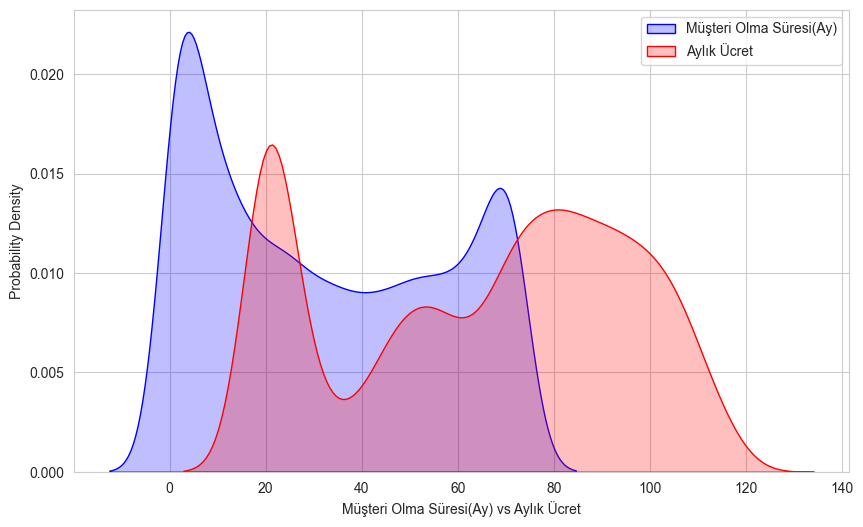

**Both are are not normally distributed, skewed,Tenure has a
Bi-modal distribution <br>Most users stayed for less than 20 months,
Monthly Charges for most people is nearly 20 unit**

In [13]:
plt.figure(figsize=(10,6),dpi=100)
sns.kdeplot(df["Müşteri Olma Süresi(Ay)"], color='b', shade=True, label='Müşteri Olma Süresi(Ay)')
sns.kdeplot(df["Aylık Ücret"], color='r', shade=True, label='Aylık Ücret')


plt.xlabel('Müşteri Olma Süresi(Ay) vs Aylık Ücret')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

printmd("""**Both are are not normally distributed, skewed,Tenure has a
Bi-modal distribution <br>Most users stayed for less than 20 months,
Monthly Charges for most people is nearly 20 unit**""")

In [4]:
# https://stackoverflow.com/a/65242391/11105356

df_g = df.groupby(['IP Tv Aboneliği', 'Kayıp Durumu']).size().reset_index()
df_g['percentage'] = df.groupby(['IP Tv Aboneliği', 'Kayıp Durumu']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['IP Tv Aboneliği', 'Kayıp Durumu', 'Counts', 'Percentage']

fig = px.bar(df_g, x='IP Tv Aboneliği', y='Counts',
       color='Kayıp Durumu',
       color_discrete_map={
        'Yes': '#99D594',
        'No': '#FC8D59',
    },
    text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

display(fig)


# Sözleşme Süresi , Ip Tv Aboneliği - Kayıp Durumu

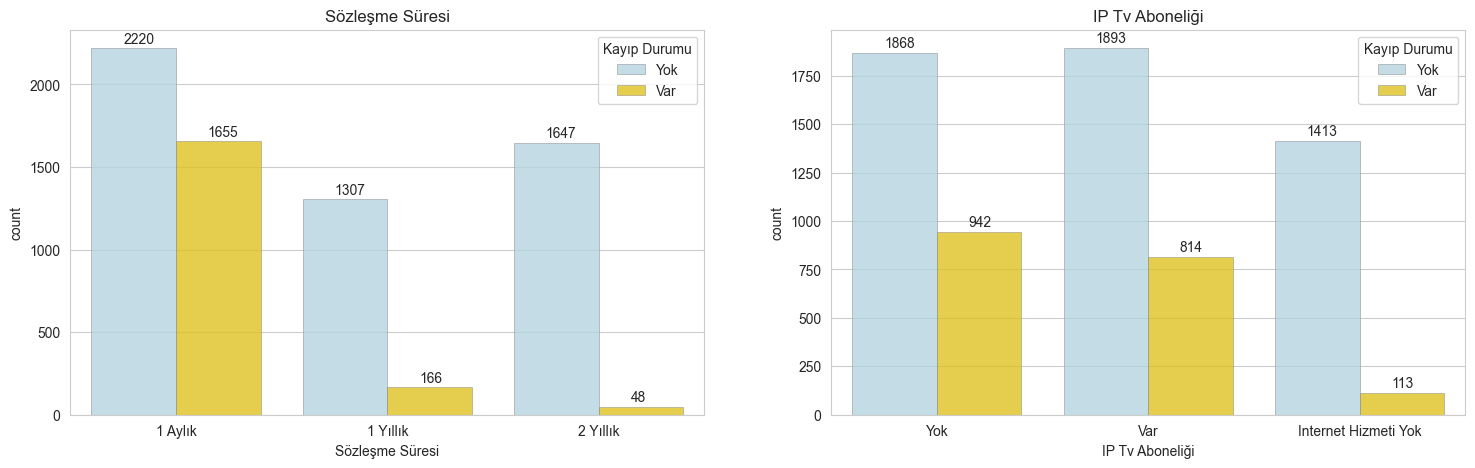

**Similar ratio between streamer vs non-streamer in churned users**

**Most churned users has Month-to-month contract**

In [5]:
plot_distribution_cat('Sözleşme Süresi', 'IP Tv Aboneliği',df)
printmd("**Similar ratio between streamer vs non-streamer in churned users**")
printmd("**Most churned users has Month-to-month contract**")

# Güvenlik Hizmeti, Medeni Durum - Kayıp Durumu

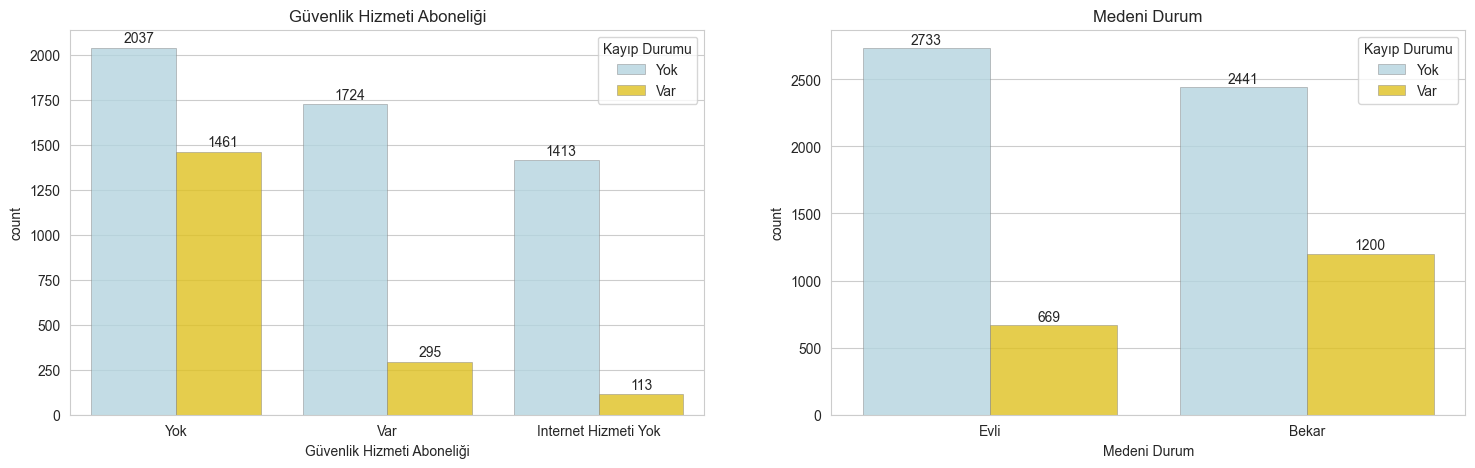

**Most churned users didn't have online security**

**Most users who churned does not have a partner in contrast to the users who does**

In [6]:
plot_distribution_cat('Güvenlik Hizmeti Aboneliği', 'Medeni Durum',df)
printmd("**Most churned users didn't have online security**")
printmd("**Most users who churned does not have a partner in contrast to the users who does**")

# Cinsiyet, Toplam Ücret ve Kayıp Durumu

**Gender is uncorrelated with churn rate**

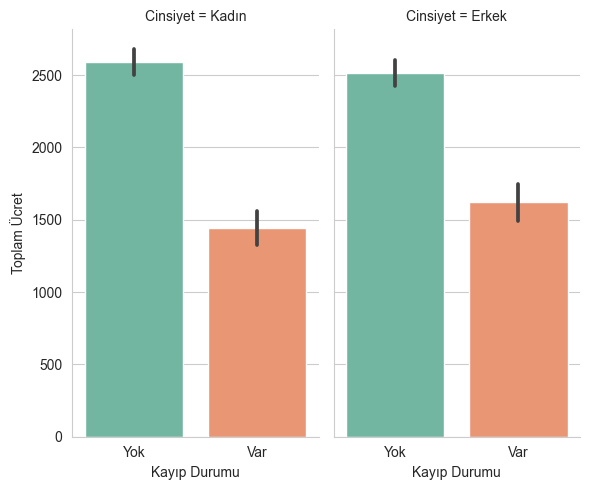

In [7]:
sns.catplot(x='Kayıp Durumu',y='Toplam Ücret', col = 'Cinsiyet', data=df,
                kind='bar', aspect=.6, palette='Set2')

printmd("**Gender is uncorrelated with churn rate**")

# Checking Outliers

In [8]:
px.box(df, x="Kayıp Durumu", y="Aylık Ücret")

In [9]:
px.box(df, x="Kayıp Durumu", y="Toplam Ücret")

In [10]:
px.box(df, x="Kayıp Durumu", y="Müşteri Olma Süresi(Ay)")

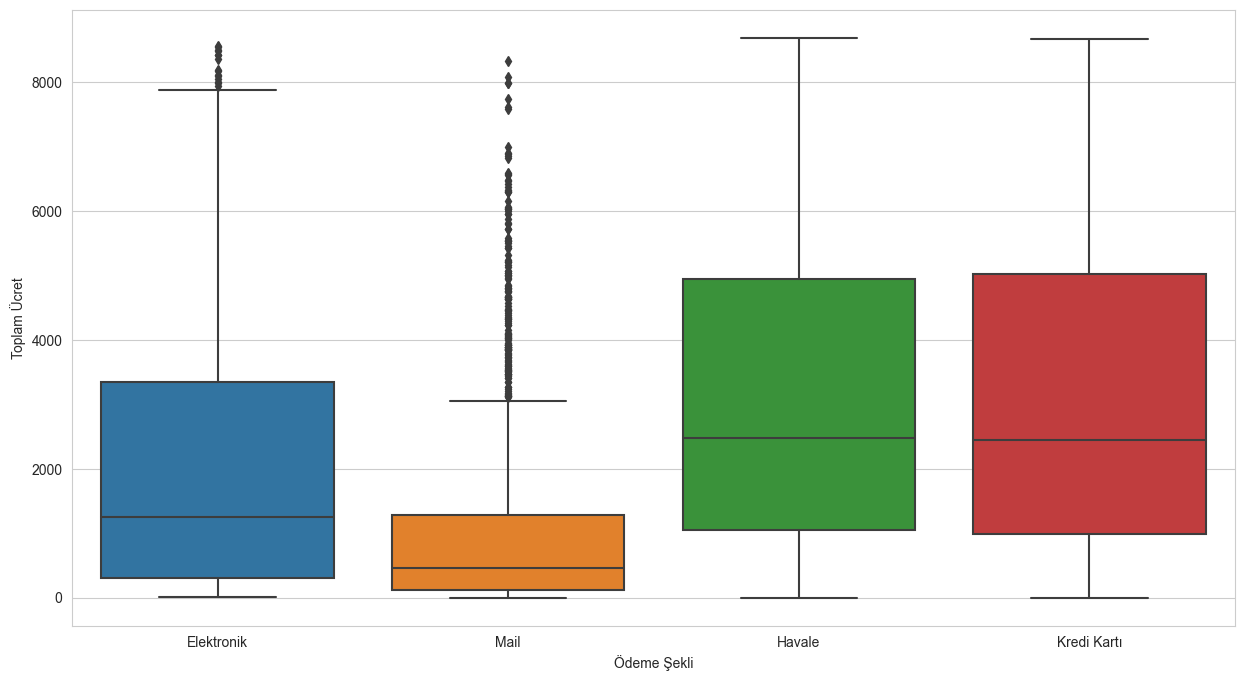

**Total Charges for many users are in extreme level in Mailed Check payment method**

In [11]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Ödeme Şekli", y="Toplam Ücret", data=df)
plt.show()

printmd("**Total Charges for many users are in extreme level in Mailed Check payment method**")

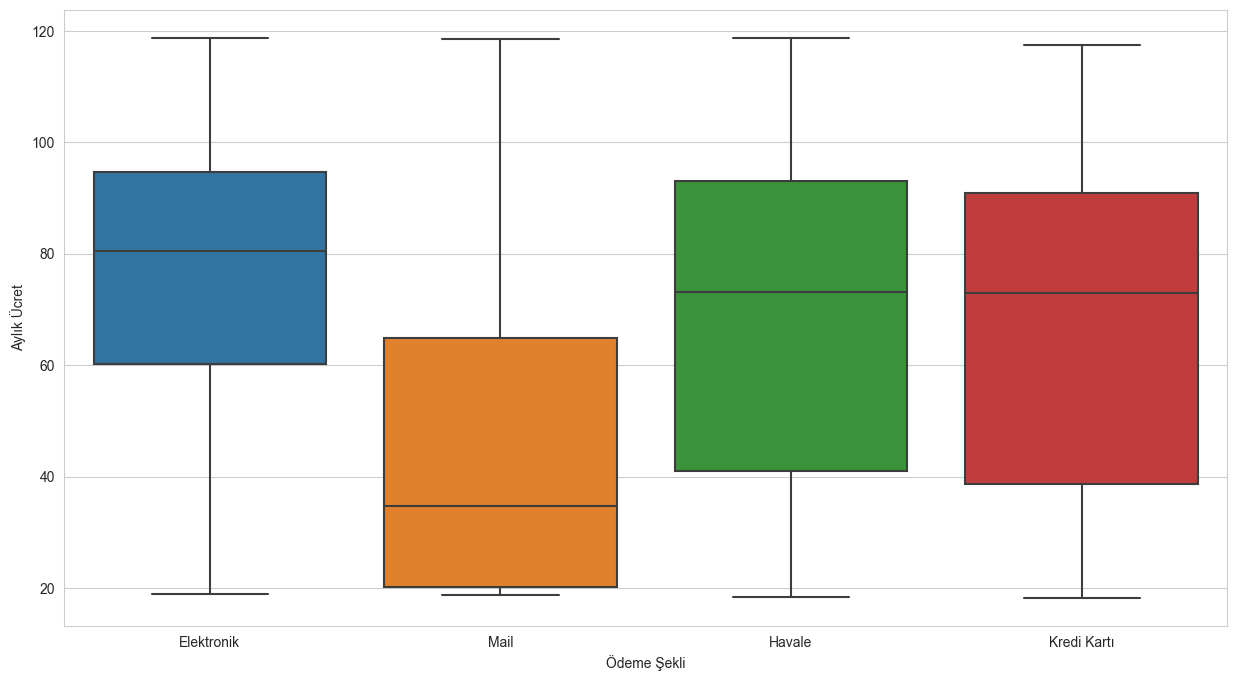

In [12]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Ödeme Şekli", y="Aylık Ücret", data=df)
plt.show()